<a href="https://colab.research.google.com/github/sameertipnis/AlgoTrading/blob/main/Lecture_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

# Agenda 

### 1.   Announcement
### 2.   Review of the first lecture
### 3.   Outline of the Course
### 4.   Brief Introduction to Python
### 5.   Writing simple screener in Python




## 1. Announcement

* ##   Three Hour Class
* ##   Office hours on Demand




## 2.Review the first lecture
* ###  Context of Algorithmic Trading - Basic Drivers
* ###  Uptick in Volume and Liquidity
* ###  Tighter spread on Products
* ###  Increase in Transperancy of Trading Activities
* ###  Provide higher value to investor and issuers.































##3. Markets and Trading 
   * ###  Buy Side Vs Sell Side
   * ###  Market Makers Vs Liquidity Seekers
   * ###  Systemic Vs Non-Systemic
   * ###  Trading Strategies
      * ### Model Based Strategies
      * ### Machine learning Model Based Strategy

## 4. Outline of the Course
* ### Lecture 3 and  Lecture 4   
   * ### VWAP Trading Strategies
   * ### Time series Analysis - ARIMA model
   * ### Long Short Equity using - Garch Model
   * ### Relative Value Strategy
* ### Lecture 5 
   * ### Machine Learning basics with Python
* ### Lecture 6 and 7
   * ### Tensor Flow pipelines for strategies 
   * ### Neural Networks using Tensor Flow
* ### Lecture 8
   * ### Renforcement learning based Trading Strategy  


## 5. Python 
* ### Why Python has gained so much acceptance in finance industry
* ### Python features which are relevant for Algotrading 
   * ### Availability of rich mathematical libraries such as Numpy
   * ### Availability of libraries for process big datasets such as Pandas
   * ### Availability of visualizing tool libraries such as Matplotlib and Seaborn
   * ### Functional language feature of Python ( in my view the most important aspect of python )
   

## 6. Python Installation 
* ### Anaconda  
* ### Juypter Notebook
* ### Google Colab 

#**Simple Momentum / Trend Following strategy** 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gld = pd.read_csv('/content/drive/My Drive/NYU/AlgoTrading-Summer-2022/TSLA.csv')

In [ ]:
gld.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-22,618.250000,628.570007,615.500000,623.710022,623.710022,19158900
1,2021-06-23,632.000000,657.200012,630.039978,656.570007,656.570007,31099200
2,2021-06-24,674.989990,697.619995,667.609985,679.820007,679.820007,45982400
3,2021-06-25,689.580017,693.809998,668.700012,671.869995,671.869995,32496700
4,2021-06-28,671.640015,694.700012,670.320007,688.719971,688.719971,21628200


In [ ]:
day = np.arange(1, len(gld) + 1)
gld['day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld = gld[['day', 'Open', 'High', 'Low', 'Close']]
gld.head()

,day,Open,High,Low,Close
0,1,618.250000,628.570007,615.500000,623.710022
1,2,632.000000,657.200012,630.039978,656.570007
2,3,674.989990,697.619995,667.609985,679.820007
3,4,689.580017,693.809998,668.700012,671.869995
4,5,671.640015,694.700012,670.320007,688.719971


### Add data/transform data
* calculate signal based on some price or statistical parameter 
* we are going to try a moving average crossover to generate signals
* for this strategy we will always by "in" a trade, either long or short
* we are modeling; this means real life variation should be expected

#### Add moving averages to the data frame

In [ ]:
gld['9-day'] = gld['Close'].rolling(9).mean()
gld['21-day'] = gld['Close'].rolling(21).mean()
gld[0:25]

,day,Open,High,Low,Close,9-day,21-day
0,1,618.250000,628.570007,615.500000,623.710022,NaN,NaN
1,2,632.000000,657.200012,630.039978,656.570007,NaN,NaN
2,3,674.989990,697.619995,667.609985,679.820007,NaN,NaN
3,4,689.580017,693.809998,668.700012,671.869995,NaN,NaN
4,5,671.640015,694.700012,670.320007,688.719971,NaN,NaN
5,6,684.650024,687.510010,675.890015,680.760010,NaN,NaN
6,7,679.770020,692.809998,678.140015,679.700012,NaN,NaN
7,8,683.919983,687.989990,672.799988,677.919983,NaN,NaN
8,9,678.979980,700.000000,673.260010,678.900024,670.885559,NaN
9,10,681.710022,684.000000,651.400024,659.580017,674.871114,NaN


#### Add "signal" column

In [ ]:
gld['signal'] = np.where(gld['9-day'] > gld['21-day'], 1, 0)
gld['signal'] = np.where(gld['9-day'] < gld['21-day'], -1, gld['signal'])
gld.dropna(inplace=True)
gld.head()

,day,Open,High,Low,Close,9-day,21-day,signal
20,21,659.609985,664.859985,650.289978,655.289978,657.933323,662.686189,-1
21,22,656.440002,662.169983,644.599976,649.260010,657.078878,663.902855,-1
22,23,646.359985,648.799988,637.299988,643.380005,652.376655,663.274760,-1
23,24,650.969971,668.200012,647.109985,657.619995,651.163323,662.217617,-1
24,25,663.400024,666.500000,627.239990,644.780029,650.207771,660.927618,-1


#### Calculate Instantaneous returns/system returns

In [ ]:
gld['return'] = np.log(gld['Close']).diff()
gld['system_return'] = gld['signal'] * gld['return']
gld['entry'] = gld.signal.diff()
gld.head(50)

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
20,21,659.609985,664.859985,650.289978,655.289978,657.933323,662.686189,-1,NaN,NaN,NaN
21,22,656.440002,662.169983,644.599976,649.260010,657.078878,663.902855,-1,-0.009245,0.009245,0.0
22,23,646.359985,648.799988,637.299988,643.380005,652.376655,663.274760,-1,-0.009098,0.009098,0.0
23,24,650.969971,668.200012,647.109985,657.619995,651.163323,662.217617,-1,0.021892,-0.021892,0.0
24,25,663.400024,666.500000,627.239990,644.780029,650.207771,660.927618,-1,-0.019718,0.019718,0.0
25,26,647.000000,654.969971,639.400024,646.979980,649.805549,658.940000,-1,0.003406,-0.003406,0.0
26,27,649.789978,683.690002,648.799988,677.349976,653.486660,658.777617,-1,0.045873,-0.045873,0.0
27,28,671.760010,697.530029,669.000000,687.200012,658.039998,659.134760,-1,0.014437,-0.014437,0.0
28,29,700.000000,726.940002,698.400024,709.669983,663.503330,660.646665,1,0.032175,0.032175,2.0
29,30,719.000000,722.650024,701.010010,709.739990,669.553331,662.115234,1,0.000099,0.000099,0.0


#### Plot trades on time series

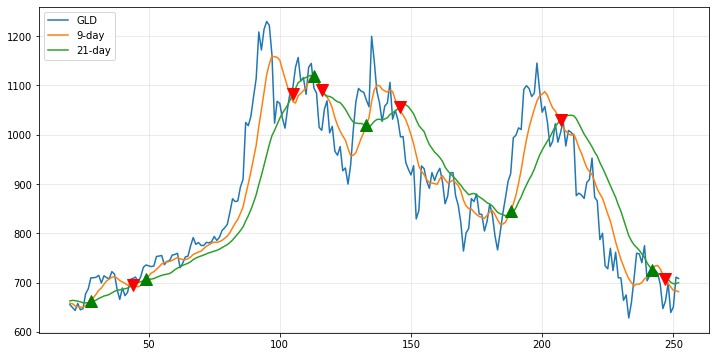

In [ ]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(gld.iloc[-252:]['Close'], label = 'GLD')
plt.plot(gld.iloc[-252:]['9-day'], label = '9-day')
plt.plot(gld.iloc[-252:]['21-day'], label = '21-day')
plt.plot(gld[-252:].loc[gld.entry == 2].index, gld[-252:]['9-day'][gld.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(gld[-252:].loc[gld.entry == -2].index, gld[-252:]['21-day'][gld.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

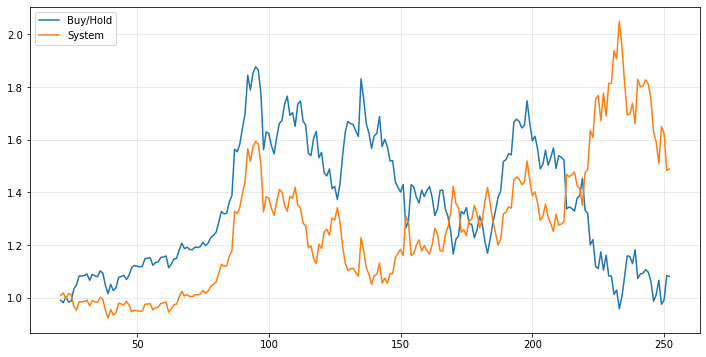

In [ ]:
plt.plot(np.exp(gld['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

# Todo 


1.   Use EMA instead of mean
3.   Implement a mean reverting strategy
2.   Use sell short positionlimit of 5 and long buy position limit of 5 - but keep buy sell order to size to 1





# To Ponder
SPY it is an index of top 500 stocks by market cap
It is weighted by market cap.


In [ ]:
l = [1,2,3,4,5,6]

In [ ]:
#l[<startindex>:<endindex>:<jump>]
# 1 -> 0, 2->1 , .... 6->5
# 1->-6, 2-> -5 ..... 6->-1
l[-6:]

[1, 2, 3, 4, 5, 6]

In [ ]:
l[::-1]

[6, 5, 4, 3, 2, 1]

In [ ]:
l[::2]

[1, 3, 5]

In [ ]:
for i in l[::2]:
  print(i**2)

1
9
25


# Market Neutral 
- Fully Hedged - variations in market does not affect your portfolio 
- bought SPY @ 100
- soldSPY Constituents > @ 105
- Net Profit is $5 and you are market neutral
- SPY Futures  - and they are traded only on CME/Globex
- Relative Value trading 

  - Covariance
  - Cointegration